In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("simulation"))))

import Configurations
from utils import modelUtils
from utils import plotUtils
from simulation import simulationProfile as profiles
import random
from tensorflow import keras
import keras.layers as layers
from matplotlib import pyplot as plt

Configuration report:
Number of Subgroups is: 7
The Trend Simulation Formel is: x*1.3+10
randomshift ist: False
shift-value= 0.5  and  3.0
main dir: ../


In [16]:
# 7 point
neuralInputsNumber = Configurations.neuralInputsNumber
targetVarNumber = Configurations.numberOftargetVariables
x, y, test_x, test_y = modelUtils.getTrainAndTestData()


In [2]:
#profiles
#profiles.setProfile_7x_m13_randShift()
#profiles.setProfile_7x_m08_randShift()
profiles.setProfile_7x_m04_randShift()
neuralInputsNumber = Configurations.neuralInputsNumber
targetVarNumber = Configurations.numberOftargetVariables
x, y, test_x, test_y = modelUtils.getTrainAndTestData()


n= 7 trend_optimize= True randomShift= True
exportSuffix= 7x_m04_randShift/


In [2]:
# 7*4 points
from simulation import quadraticTrend
neuralInputsNumber = Configurations.neuralInputsNumber
targetVarNumber = Configurations.numberOftargetVariables
x, y, test_x, test_y = modelUtils.getTrainAndTestData()

quadraticTrend ist imported... Globale Setting will be changed


In [3]:
print(len(test_y[0]))

5


In [11]:
# 4 points
# Prepare Training data
x, y, test_x, test_y = modelUtils.getTrainAndTestData()
# cut data for prediction
DataPoinstsNumber = 4
x_classicfication_test = test_x
x = x[:,0:DataPoinstsNumber]
test_x = test_x[:,0:DataPoinstsNumber]
neuralInputsNumber = DataPoinstsNumber
targetVarNumber = Configurations.numberOftargetVariables

In [3]:
results_list=[]
best_results=[]
history_for_best_result = []
def initModel():
    model = keras.Sequential()
    model.add(layers.Dense( neuralInputsNumber, activation='relu'))
    return model
def closeAndFitModel(model,epochs):
    model.add(layers.Dense(targetVarNumber, activation='sigmoid'))
    model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x, y, batch_size=16 ,epochs=epochs,validation_data=(test_x, test_y))
    return model,history
def fillModel(model):
    layers_min = 2
    layers_max = 2
    node_min= 60
    node_max= 90
    layers_number = random.randint(layers_min, layers_max)
    nodes_number_list=[]
    for layer in range(layers_number):
        nodes_number = random.randint(node_min, node_max)
        nodes_number_list.append(nodes_number)
        model.add(layers.Dense(nodes_number, activation="relu"))
    return model,layers_number,nodes_number_list   
def setHistory(history):
    global history_for_best_result
    history_for_best_result = history
    
def searchOptimum(roundsNumber):
    epochs = 30
    bestResult = 0
    for round in range(roundsNumber):
        print("Round Number:",round)
        model = initModel()
        model,layers_number,nodes_number_list = fillModel(model)
        model,training_history = closeAndFitModel(model,epochs)
        model_accuracy = model.evaluate(test_x, test_y)
        if(model_accuracy[1] > bestResult):
            best_results.append((model_accuracy[1],layers_number,nodes_number_list))
            bestResult = model_accuracy[1]
            setHistory(training_history)
        results_list.append((model_accuracy[1],layers_number,nodes_number_list))
    print("The best results are :",best_results)


Round Number: 0
Epoch 1/30
313/313 [==============================] - 1s 2ms/step - loss: 0.2689 - accuracy: 0.7214 - val_loss: 0.1687 - val_accuracy: 0.8352
Epoch 2/30
313/313 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.8474 - val_loss: 0.1309 - val_accuracy: 0.8752
Epoch 3/30
313/313 [==============================] - 0s 1ms/step - loss: 0.1310 - accuracy: 0.8684 - val_loss: 0.1191 - val_accuracy: 0.8816
Epoch 4/30
313/313 [==============================] - 0s 1000us/step - loss: 0.1237 - accuracy: 0.8694 - val_loss: 0.1149 - val_accuracy: 0.8882
Epoch 5/30
313/313 [==============================] - 0s 933us/step - loss: 0.1192 - accuracy: 0.8740 - val_loss: 0.1099 - val_accuracy: 0.8936
Epoch 6/30
313/313 [==============================] - 0s 952us/step - loss: 0.1155 - accuracy: 0.8806 - val_loss: 0.1080 - val_accuracy: 0.8928
Epoch 7/30
313/313 [==============================] - 0s 936us/step - loss: 0.1125 - accuracy: 0.8850 - val_loss: 0.1054 - va

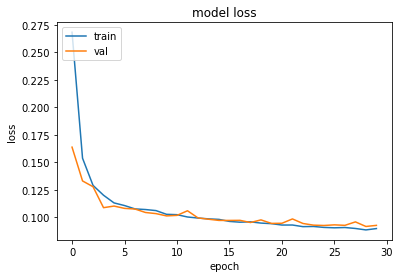

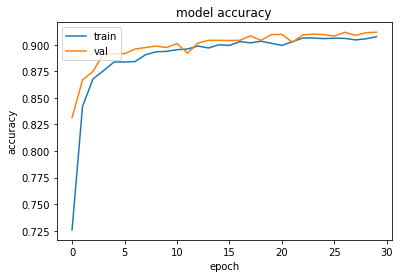

In [4]:
searchOptimum(50)
plotUtils.plotLoss(history_for_best_result)
plotUtils.plotAccuracy(history_for_best_result)
#The best results are : [(0.7577142715454102, 2, [68, 88]), (0.7715714573860168, 2, [91, 68]), (0.8115714192390442, 2, [90, 95]), (0.8360000252723694, 2, [90, 77]), (0.8761428594589233, 2, [89, 73])]
#(0.9908571243286133, 35, [111, 107, 75, 99, 69, 102, 98, 86, 77, 107, 98, 91, 114, 106, 116, 117, 86, 93, 92, 87, 102, 112, 120, 105, 99, 66, 97, 102, 109, 119, 107, 100, 87, 73, 65])]


In [6]:
#(0.9417999982833862, 3, [82, 74, 86])
#(0.9793999791145325, 2, [97, 73])
#(0.9807999730110168, 1, [100])
#(0.979200005531311, 9, [82, 106, 73, 78, 112, 80, 79, 112, 113])
#[75, 97, 55, 11]
#[(0.9453681707382202, 2, [4, 54]), (0.948931097984314, 1, [23]), (0.9513064026832581, 2, [20, 5])]
#[(0.9370546340942383, 1, [115]), (0.9429928660392761, 1, [59]), (0.9453681707382202, 1, [7]), (0.948931097984314, 1, [30]), (0.9513064026832581, 1, [12])]
#[(0.9501187801361084, 1, [10]), (0.9513064026832581, 1, [6]), (0.9524940848350525, 1, [9])]

#(0.9696470499038696, 2, [2, 6]), (0.9717646837234497, 1, [65]), (0.9729411602020264, 1, [7]), (0.9795294404029846, 3, [68, 97, 90]), (0.9807058572769165, 2, [76, 71]), (0.9823529124259949, 2, [93, 38]), (0.9825882315635681, 2, [102, 13]), (0.984000027179718, 2, [70, 53])]

[4, 3, 2, 2, 3, 2]


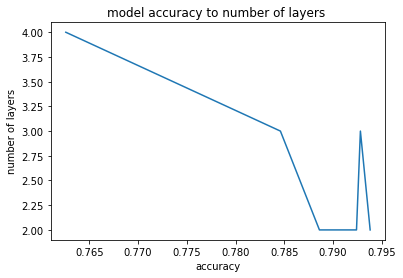

In [7]:
def plotAccuracyToLayersNumber(accuracy,layersNumber):
    plt.plot(accuracy,layersNumber)
    plt.title('model accuracy to number of layers ')
    plt.ylabel('number of layers')
    plt.xlabel('accuracy')
    plt.savefig('../plots/{}'.format("plotAccuracyToLayersNumber"), dpi=300)
    plt.show()

accuracy = [ elemnet[0] for elemnet in best_results ]
layersNumber = [ elemnet[1] for elemnet in best_results ]
print(layersNumber)
plotAccuracyToLayersNumber(accuracy,layersNumber)

In [8]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
